### **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd

import re
import string
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

## Visualization library
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

### **Loading Dataset**

In [ ]:
# importing dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nlp-getting-started/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nlp-getting-started/test.csv')

In [ ]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


### **Analysing the data**


*   The balance of the data
*   Missing values
*   Disastrous/Non-disastrous word (using word cloud graph)



In [ ]:
# check the imbalance of data
vis = df['target'].value_counts().to_frame()
vis

,target
0,4342
1,3271


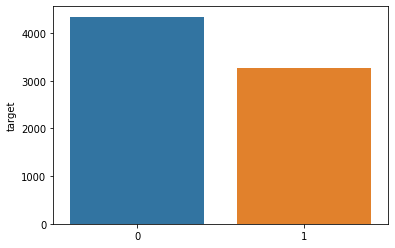

In [ ]:
sns.barplot(x=vis.index, y='target', data=vis)

In [ ]:
# Missing values
df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

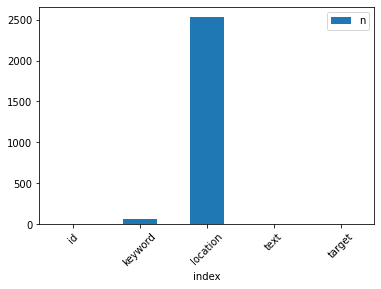

In [ ]:
df.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

In [ ]:
# plot with percentage
features = df.isna().sum().to_frame()
features

,0
id,0
keyword,61
location,2533
text,0
target,0


In [ ]:
for idx in features.index:
    features.loc[idx]=(features.loc[idx]*100)/df.shape[0]

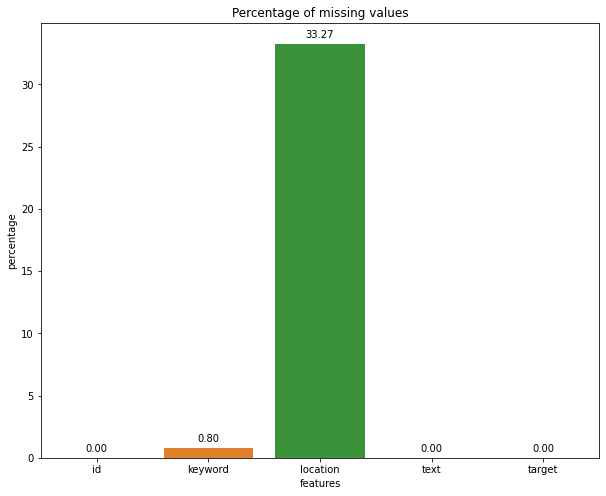

In [ ]:
# plotting the percentage of missing values
plt.figure(figsize=(10, 8))
fig = sns.barplot(x=features.index, y=0, data=features)
for p in fig.patches:
    fig.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')

plt.xlabel('features')
plt.ylabel('percentage')
plt.title('Percentage of missing values')
plt.show()

In [ ]:
# Visualizing keywords
dis_keys = df[df['target']==1]['keyword'].dropna()
non_dis_keys = df[df['target']==0]['keyword'].dropna()

Text(0.5, 1.0, 'Non-Disaster Tweets')

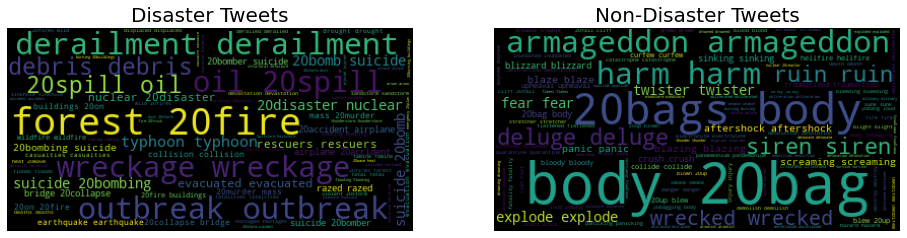

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16,8])

word_cloud1 = WordCloud().generate(" ".join(dis_keys))
word_cloud2 = WordCloud().generate(" ".join(non_dis_keys))

ax1.imshow(word_cloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=20)

ax2.imshow(word_cloud2)
ax2.axis('off')
ax2.set_title('Non-Disaster Tweets',fontsize=20)

In [ ]:
df[df['keyword']=='harm']

,id,keyword,location,text,target
4138,5885,harm,Global,Quality Metrics Penalties May Harm Patient Car...,0
4139,5886,harm,"Massachusetts, USA",@tareksocal I think a lot of celebrities have ...,0
4140,5887,harm,NaN,sticks and stones may break my bones\nbut word...,0
4141,5888,harm,NaN,i s2g if anyone tries to harm my cupcake i'll ...,0
4142,5889,harm,"Queensland, Australia",Vanderbilt: First Do No Harm http://t.co/cCdx7...,0
4143,5890,harm,Kansas City,@leedsrouge Love what you picked! We're playin...,1
4144,5891,harm,"Cleveland, OH - San Diego, CA",IMAGINE A DOCTOR TREATING AN #EBOLA PATIENT WI...,1
4145,5892,harm,NaN,'But right now you're only annoyed by them. If...,0
4146,5893,harm,The barn,I've burned myself before not in the self harm...,0
4147,5894,harm,where the wild things are,I concur. The longer you spend with your child...,0


### **Preprocessing the data**


*   Cleaning
*   Tokenising
*   Lemmatization
etc.


In [ ]:
# getting data
data = df['keyword'].replace(np.nan, '') + " " + df['location'].replace(np.nan, '') + " " + df['text']
data = data.to_frame('text')

In [ ]:
data['text']

0         Our Deeds are the Reason of this #earthquake...
1                  Forest fire near La Ronge Sask. Canada
2         All residents asked to 'shelter in place' ar...
3         13,000 people receive #wildfires evacuation ...
4         Just got sent this photo from Ruby #Alaska a...
                              ...                        
7608      Two giant cranes holding a bridge collapse i...
7609      @aria_ahrary @TheTawniest The out of control...
7610      M1.94 [01:04 UTC]?5km S of Volcano Hawaii. h...
7611      Police investigating after an e-bike collide...
7612      The Latest: More Homes Razed by Northern Cal...
Name: text, Length: 7613, dtype: object

In [ ]:
# data which have keywords present
data[df['keyword'].isnull() == False]['text']

31      ablaze Birmingham @bbcmtd Wholesale Markets ab...
32      ablaze Est. September 2012 - Bristol We always...
33      ablaze AFRICA #AFRICANBAZE: Breaking news:Nige...
34      ablaze Philadelphia, PA Crying out for more! S...
35      ablaze London, UK On plus side LOOK AT THE SKY...
                              ...                        
7578    wrecked  @jt_ruff23 @cameronhacker and I wreck...
7579    wrecked Vancouver, Canada Three days off from ...
7580    wrecked London  #FX #forex #trading Cramer: Ig...
7581    wrecked Lincoln @engineshed Great atmosphere a...
7582    wrecked  Cramer: Iger's 3 words that wrecked D...
Name: text, Length: 7552, dtype: object

In [ ]:
df.iloc[31]

id                                                         48
keyword                                                ablaze
location                                           Birmingham
text        @bbcmtd Wholesale Markets ablaze http://t.co/l...
target                                                      1
Name: 31, dtype: object

#### Cleaning Data

In [ ]:
def preProcess(data, exp=True):
    # Print the total number of unique words
    all_words = ' '.join(data['text'])
    freq_d = pd.Series(all_words.split()).value_counts()
    print('Before preprocessing: ',len(freq_d))

    # lowering the data
    data['text'] = data['text'].apply(lambda x:x.lower())
    
    #removing hyperlink
    data['text'] = data['text'].apply(lambda x:re.sub('https?://\S+|www\.\S+', ' ', x))

    #remove words containing numbers
    data['text'] = data['text'].apply(lambda x:re.sub('\w*\d\w*' , ' ', x))
    
    # making explicit word for replacement
    if exp:
        data['text'] = data['text'].apply(lambda x: re.sub(r"i'm", "i am", x))
        data['text'] = data['text'].apply(lambda x: re.sub(r"i've", "i have", x))
        data['text'] = data['text'].apply(lambda x: re.sub(r"would've", "would have", x))
        data['text'] = data['text'].apply(lambda x: re.sub(r"he's", "he is", x))
        data['text'] = data['text'].apply(lambda x: re.sub(r"she's", "she is", x))
        data['text'] = data['text'].apply(lambda x: re.sub(r"that's", "that is", x))
        data['text'] = data['text'].apply(lambda x: re.sub(r"what's", "what is", x))
        data['text'] = data['text'].apply(lambda x: re.sub(r"where's", "where is", x))
        data['text'] = data['text'].apply(lambda x: re.sub(r"\'ll", " will", x))
        data['text'] = data['text'].apply(lambda x: re.sub(r"\'re", " are", x))
        data['text'] = data['text'].apply(lambda x: re.sub(r"\'d", " would", x))
        data['text'] = data['text'].apply(lambda x: re.sub(r"\'ve", " have", x))
        data['text'] = data['text'].apply(lambda x: re.sub(r"won't", "will not", x))
        data['text'] = data['text'].apply(lambda x: re.sub(r"don't", "do not", x))
        data['text'] = data['text'].apply(lambda x: re.sub(r"didn't", "did not", x))
        data['text'] = data['text'].apply(lambda x: re.sub(r"can't", "can not", x))
        data['text'] = data['text'].apply(lambda x: re.sub(r"couldn't", "could not", x))
        data['text'] = data['text'].apply(lambda x: re.sub(r"it's", "it is", x))
        data['text'] = data['text'].apply(lambda x: re.sub(r"haven't", "have not", x))

    # remove punctuation
    data['text'] = data['text'].apply(lambda x: re.sub("[^A-Za-z]+", ' ', x))

    all_words = ' '.join(data['text'])
    freq_d = pd.Series(all_words.split()).value_counts()
    print('After preprocessing: ',len(freq_d))
    return data

In [ ]:
# stop-word
import spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words

sw_nltk = set(stopwords.words('english'))

def remStopwords(data, stop_words):
    all_words = ' '.join(data['text'])
    freq_d = pd.Series(all_words.split()).value_counts()
    print('Before removing stopword :',len(freq_d))

    data['text'] = data['text'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))

    all_words = ' '.join(data['text'])
    freq_d = pd.Series(all_words.split()).value_counts()
    print('After removing stopword :',len(freq_d))

    return data

In [ ]:
# frequency visualisation
def freqVis(data, start, end=None):
    all_words = ' '.join(data['text'])
    # print('All Words - ', all_words)
    
    freq_d = pd.Series(all_words.split()).value_counts()
    print(len(freq_d))
    if(end != None):
        dd = freq_d.apply(lambda x: x >= start and x <= end)
        print(freq_d[dd])
    else:
        print(freq_d[freq_d >= start])

In [ ]:
# eliminating most frequent features/word
def getFreqSet(data, freq):
    texts = ' '.join(data['text'])
    freq_d = pd.Series(texts.split()).value_counts()
    s = freq_d[freq_d > freq].index

    return set(s)

def remFreq(data, freq):
    freq_word = getFreqSet(data, freq)
    data['text'] = data['text'].apply(lambda x: " ".join([word for word in x.split() if word not in freq_word]))

    return data

In [ ]:
# lemmatization and stemming
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    data['text'] = data.text.apply(lambda x: " ".join([lemmatizer.lemmatize(token) for token in x.split()]))
    data.head()

    return data

def stemming(data):
    stemmer = PorterStemmer()
    data['text'] = data.text.apply(lambda x: " ".join([stemmer.stem(token) for token in x.split()]))
    data.head()

    return data

# **Implementaion and analysing from results**


1.   Different ways of preProcessing
2.   Stemming and Lemmatization
3.   Use of two different stopwords
4.   Custom frequent stopwords
5.   Using different methods to convert text to number

In [ ]:
preProc = preProcess(data.copy(True))
preProc.head()

Before preprocessing:  35068
After preprocessing:  17399


,text
0,our deeds are the reason of this earthquake m...
1,forest fire near la ronge sask canada
2,all residents asked to shelter in place are b...
3,people receive wildfires evacuation orders in...
4,just got sent this photo from ruby alaska as ...


In [ ]:
# stemming and lemmatization
stem = stemming(preProc.copy(True))
lem = lemmatization(preProc.copy(True))

In [ ]:
stem = preProcess(stem)
lem = preProcess(lem)

Before preprocessing:  14289
After preprocessing:  14289
Before preprocessing:  16107
After preprocessing:  16107


In [ ]:
stem.head()

,text
0,our deed are the reason of thi earthquak may a...
1,forest fire near la rong sask canada
2,all resid ask to shelter in place are be notif...
3,peopl receiv wildfir evacu order in california
4,just got sent thi photo from rubi alaska as sm...


In [ ]:
lem.head()

,text
0,our deed are the reason of this earthquake may...
1,forest fire near la ronge sask canada
2,all resident asked to shelter in place are bei...
3,people receive wildfire evacuation order in ca...
4,just got sent this photo from ruby alaska a sm...


In [ ]:
# removal of stopwords
rem_sw = remStopwords(stem.copy(True), sw_nltk)
rem_sw.head()

Before removing stopword : 14289
After removing stopword : 14167


,text
0,deed reason thi earthquak may allah forgiv us
1,forest fire near la rong sask canada
2,resid ask shelter place notifi offic evacu she...
3,peopl receiv wildfir evacu order california
4,got sent thi photo rubi alaska smoke wildfir p...


In [ ]:
rem_sw_lem = remStopwords(lem.copy(True), sw_nltk)
rem_sw_lem.head()

Before removing stopword : 16107
After removing stopword : 15965


,text
0,deed reason earthquake may allah forgive u
1,forest fire near la ronge sask canada
2,resident asked shelter place notified officer ...
3,people receive wildfire evacuation order calif...
4,got sent photo ruby alaska smoke wildfire pour...


In [ ]:
rem_spacy = remStopwords(stem.copy(True), sw_spacy)
rem_spacy.head()

Before removing stopword : 14289
After removing stopword : 14097


,text
0,deed reason thi earthquak allah forgiv
1,forest fire near la rong sask canada
2,resid ask shelter place notifi offic evacu she...
3,peopl receiv wildfir evacu order california
4,got sent thi photo rubi alaska smoke wildfir p...


In [ ]:
rem_spacy_lem = remStopwords(lem.copy(True), sw_spacy)
rem_spacy_lem.head()

Before removing stopword : 16107
After removing stopword : 15839


,text
0,deed reason earthquake allah forgive u
1,forest fire near la ronge sask canada
2,resident asked shelter place notified officer ...
3,people receive wildfire evacuation order calif...
4,got sent photo ruby alaska smoke wildfire pour...


In [ ]:
both = sw_spacy.union(sw_nltk)
print('sw_nltk :', len(sw_nltk), '|| sw_spacy :', len(sw_spacy), '|| both :', len(both))

sw_nltk : 179 || sw_spacy : 326 || both : 382


In [ ]:
rem_both = remStopwords(stem.copy(True), both)
rem_both.head()

Before removing stopword : 14289
After removing stopword : 14074


,text
0,deed reason thi earthquak allah forgiv
1,forest fire near la rong sask canada
2,resid ask shelter place notifi offic evacu she...
3,peopl receiv wildfir evacu order california
4,got sent thi photo rubi alaska smoke wildfir p...


In [ ]:
rem_both_lem = remStopwords(lem.copy(True), both)
rem_both_lem.head()

Before removing stopword : 16107
After removing stopword : 15814


,text
0,deed reason earthquake allah forgive u
1,forest fire near la ronge sask canada
2,resident asked shelter place notified officer ...
3,people receive wildfire evacuation order calif...
4,got sent photo ruby alaska smoke wildfire pour...


## **Frequency analysis**

In [ ]:
# before removed stopwords
freqVis(stem, 300)

14289
the     3461
a       2271
in      2080
to      1972
of      1909
i       1810
and     1462
is      1311
you      917
for      905
on       892
it       867
s        722
my       708
not      636
that     633
with     582
at       553
are      541
by       534
be       504
have     500
thi      486
new      439
fire     434
from     432
wa       417
like     414
do       378
will     344
amp      344
me       341
bomb     339
as       336
up       335
am       330
but      328
your     327
just     324
so       321
get      313
we       305
dtype: int64


In [ ]:
# after removed stopwords
freqVis(rem_sw, 300)

14167
thi     486
new     439
fire    434
wa      417
like    414
amp     344
bomb    339
get     313
dtype: int64


In [ ]:
freqVis(rem_spacy, 300)

14097
s       722
thi     486
new     439
fire    434
wa      417
like    414
amp     344
bomb    339
dtype: int64


In [ ]:
freqVis(rem_both, 300)

14074
thi     486
new     439
fire    434
wa      417
like    414
amp     344
bomb    339
dtype: int64


In [ ]:
freqVis(rem_sw_lem, 300)

15965
new     439
fire    427
wa      417
like    353
amp     344
u       303
dtype: int64


In [ ]:
freqVis(rem_spacy_lem, 300)

15839
s       734
new     439
fire    427
wa      417
like    353
amp     344
u       303
dtype: int64


In [ ]:
freqVis(rem_both_lem, 300)

15814
new     439
fire    427
wa      417
like    353
amp     344
u       303
dtype: int64


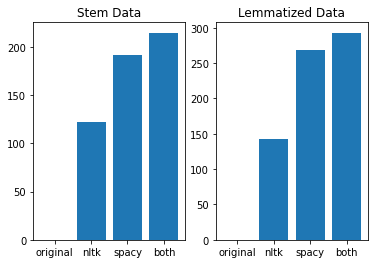

In [ ]:
# based on stemming
x = ['original', 'nltk', 'spacy', 'both']
y1 = [14289, 14167, 14097, 14074]
y1 = [(14289 - v) for v in y1]

y2 = [16107, 15965, 15839, 15814]
y2 = [(16107 - v) for v in y2]

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.bar(x, y1)
ax2.bar(x, y2)

ax1.set_title('Stem Data')
ax2.set_title('Lemmatized Data')
plt.show()

In [ ]:
freqVis(rem_sw, 200, 300)

14167
burn          285
usa           282
flood         278
emerg         269
fatal         265
bodi          264
ha            257
evacu         243
crash         233
via           229
derail        228
attack        226
build         222
scream        221
suicid        219
one           211
news          208
drown         205
california    204
go            204
peopl         201
dtype: int64


In [ ]:
freqVis(rem_spacy, 200, 300)

14097
burn          285
usa           282
flood         278
emerg         269
fatal         265
bodi          264
ha            257
evacu         243
crash         233
derail        228
attack        226
build         222
t             221
scream        221
suicid        219
news          208
drown         205
california    204
peopl         201
dtype: int64


In [ ]:
freqVis(rem_both, 200, 300)

14074
burn          285
usa           282
flood         278
emerg         269
fatal         265
bodi          264
ha            257
evacu         243
crash         233
derail        228
attack        226
build         222
scream        221
suicid        219
news          208
drown         205
california    204
peopl         201
dtype: int64


In [ ]:
# lem
freqVis(rem_both_lem, 150, 300)

15814
usa           282
emergency     264
body          263
ha            257
suicide       219
building      210
news          208
california    204
people        201
disaster      196
burning       192
death         189
flood         186
police        181
year          177
video         176
nuclear       174
weapon        168
time          168
world         165
storm         164
crash         158
fatality      158
injury        158
state         156
york          156
bomb          155
city          155
home          152
dtype: int64


In [ ]:
freqVis(rem_both_lem, 300)

15814
new     439
fire    427
wa      417
like    353
amp     344
u       303
dtype: int64


## **Removing most frequent word**

In [ ]:
rem_freq_s = remFreq(rem_both, 400)

In [ ]:
rem_freq_s.head()

,text
0,deed reason earthquak allah forgiv
1,forest near la rong sask canada
2,resid ask shelter place notifi offic evacu she...
3,peopl receiv wildfir evacu order california
4,got sent photo rubi alaska smoke wildfir pour ...


# **Model Implementation**

In [ ]:
import itertools

def confusion_matrix_plot(cm, classes, normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without normalization")
    
    thres = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thres else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted label')
    plt.show()

### **Classification**

In [ ]:
models= {
    "logistic_regression": LogisticRegression(),
    "naive_bayes": MultinomialNB(),
    "random_forest": RandomForestClassifier(n_estimators=40)
}

vectors = {
    "count_vect": CountVectorizer(),
    "count_vect1": CountVectorizer(ngram_range=(1,2)),
    "count_vect2": CountVectorizer(ngram_range=(1,3)),
    "tfidf_vect": TfidfVectorizer()
}

texts_data = {
    "lemmatized_data":rem_both_lem, 
    "stem_data": rem_both
}

Model = LogisticRegression() 	Vector = CountVectorizer()
Confusion Matrix, without normalization


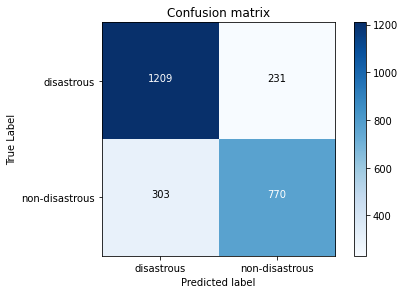

Accuracy_score:  0.7875049741345006
Precision_score:  0.7692307692307693
Recall_score:  0.7176141658900279
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1440
           1       0.77      0.72      0.74      1073

    accuracy                           0.79      2513
   macro avg       0.78      0.78      0.78      2513
weighted avg       0.79      0.79      0.79      2513




Model = MultinomialNB() 	Vector = CountVectorizer()
Confusion Matrix, without normalization


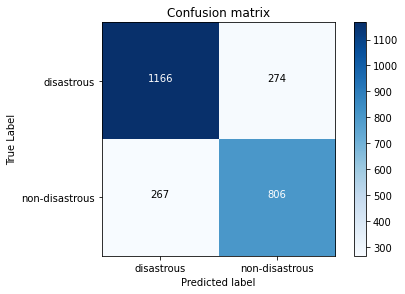

Accuracy_score:  0.7847194588141664
Precision_score:  0.7462962962962963
Recall_score:  0.7511649580615097
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1440
           1       0.75      0.75      0.75      1073

    accuracy                           0.78      2513
   macro avg       0.78      0.78      0.78      2513
weighted avg       0.78      0.78      0.78      2513




Model = RandomForestClassifier(n_estimators=40) 	Vector = CountVectorizer()
Confusion Matrix, without normalization


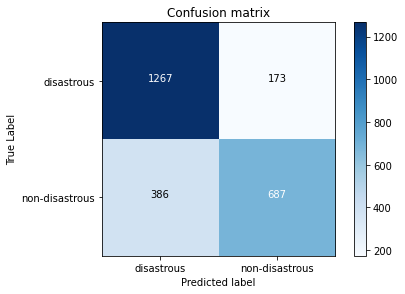

Accuracy_score:  0.7775567051333068
Precision_score:  0.7988372093023256
Recall_score:  0.6402609506057781
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      1440
           1       0.80      0.64      0.71      1073

    accuracy                           0.78      2513
   macro avg       0.78      0.76      0.77      2513
weighted avg       0.78      0.78      0.77      2513




Model = LogisticRegression() 	Vector = CountVectorizer(ngram_range=(1, 2))
Confusion Matrix, without normalization


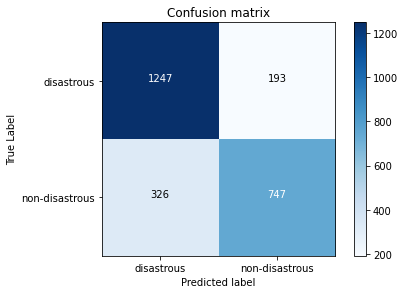

Accuracy_score:  0.7934739355352168
Precision_score:  0.7946808510638298
Recall_score:  0.6961789375582479
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1440
           1       0.79      0.70      0.74      1073

    accuracy                           0.79      2513
   macro avg       0.79      0.78      0.78      2513
weighted avg       0.79      0.79      0.79      2513




Model = MultinomialNB() 	Vector = CountVectorizer(ngram_range=(1, 2))
Confusion Matrix, without normalization


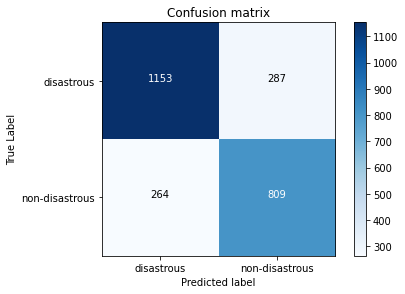

Accuracy_score:  0.7807401512136888
Precision_score:  0.7381386861313869
Recall_score:  0.7539608574091333
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1440
           1       0.74      0.75      0.75      1073

    accuracy                           0.78      2513
   macro avg       0.78      0.78      0.78      2513
weighted avg       0.78      0.78      0.78      2513




Model = RandomForestClassifier(n_estimators=40) 	Vector = CountVectorizer(ngram_range=(1, 2))
Confusion Matrix, without normalization


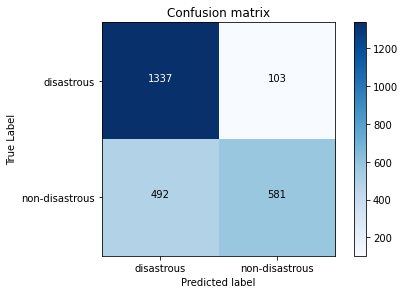

Accuracy_score:  0.7632311977715878
Precision_score:  0.8494152046783626
Recall_score:  0.5414725069897484
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.93      0.82      1440
           1       0.85      0.54      0.66      1073

    accuracy                           0.76      2513
   macro avg       0.79      0.73      0.74      2513
weighted avg       0.78      0.76      0.75      2513




Model = LogisticRegression() 	Vector = CountVectorizer(ngram_range=(1, 3))
Confusion Matrix, without normalization


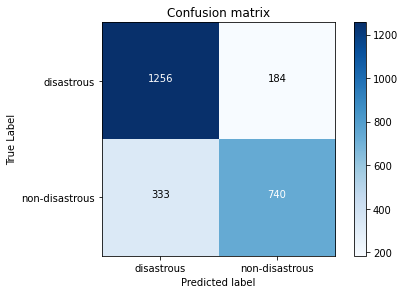

Accuracy_score:  0.7942697970553124
Precision_score:  0.8008658008658008
Recall_score:  0.6896551724137931
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1440
           1       0.80      0.69      0.74      1073

    accuracy                           0.79      2513
   macro avg       0.80      0.78      0.79      2513
weighted avg       0.79      0.79      0.79      2513




Model = MultinomialNB() 	Vector = CountVectorizer(ngram_range=(1, 3))
Confusion Matrix, without normalization


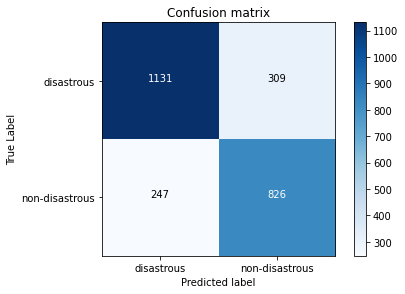

Accuracy_score:  0.77875049741345
Precision_score:  0.7277533039647577
Recall_score:  0.7698042870456664
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1440
           1       0.73      0.77      0.75      1073

    accuracy                           0.78      2513
   macro avg       0.77      0.78      0.78      2513
weighted avg       0.78      0.78      0.78      2513




Model = RandomForestClassifier(n_estimators=40) 	Vector = CountVectorizer(ngram_range=(1, 3))
Confusion Matrix, without normalization


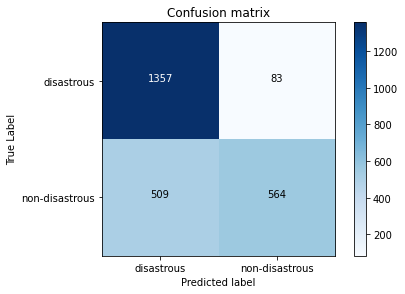

Accuracy_score:  0.764424990051731
Precision_score:  0.8717156105100463
Recall_score:  0.5256290773532153
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.94      0.82      1440
           1       0.87      0.53      0.66      1073

    accuracy                           0.76      2513
   macro avg       0.80      0.73      0.74      2513
weighted avg       0.79      0.76      0.75      2513




Model = LogisticRegression() 	Vector = TfidfVectorizer()
Confusion Matrix, without normalization


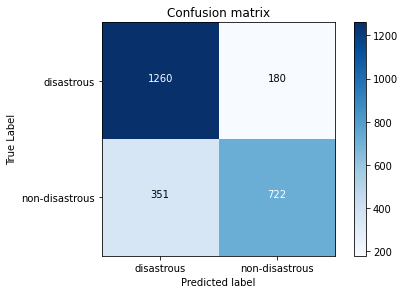

Accuracy_score:  0.7886987664146439
Precision_score:  0.8004434589800443
Recall_score:  0.6728797763280522
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1440
           1       0.80      0.67      0.73      1073

    accuracy                           0.79      2513
   macro avg       0.79      0.77      0.78      2513
weighted avg       0.79      0.79      0.79      2513




Model = MultinomialNB() 	Vector = TfidfVectorizer()
Confusion Matrix, without normalization


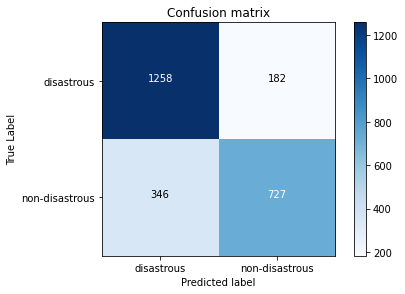

Accuracy_score:  0.7898925586947871
Precision_score:  0.7997799779977998
Recall_score:  0.6775396085740913
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.87      0.83      1440
           1       0.80      0.68      0.73      1073

    accuracy                           0.79      2513
   macro avg       0.79      0.78      0.78      2513
weighted avg       0.79      0.79      0.79      2513




Model = RandomForestClassifier(n_estimators=40) 	Vector = TfidfVectorizer()
Confusion Matrix, without normalization


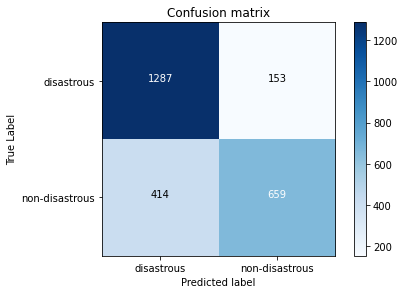

Accuracy_score:  0.7743732590529248
Precision_score:  0.8115763546798029
Recall_score:  0.614165890027959
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1440
           1       0.81      0.61      0.70      1073

    accuracy                           0.77      2513
   macro avg       0.78      0.75      0.76      2513
weighted avg       0.78      0.77      0.77      2513




Model = LogisticRegression() 	Vector = CountVectorizer()
Confusion Matrix, without normalization


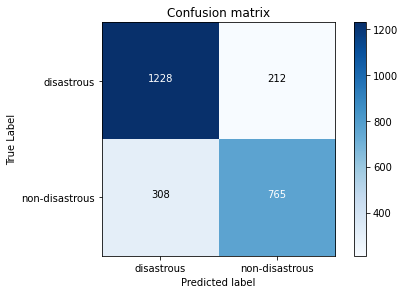

Accuracy_score:  0.7930760047751692
Precision_score:  0.7830092118730808
Recall_score:  0.7129543336439889
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1440
           1       0.78      0.71      0.75      1073

    accuracy                           0.79      2513
   macro avg       0.79      0.78      0.79      2513
weighted avg       0.79      0.79      0.79      2513




Model = MultinomialNB() 	Vector = CountVectorizer()
Confusion Matrix, without normalization


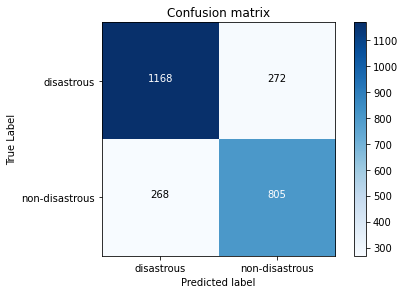

Accuracy_score:  0.7851173895742141
Precision_score:  0.7474466109563602
Recall_score:  0.750232991612302
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1440
           1       0.75      0.75      0.75      1073

    accuracy                           0.79      2513
   macro avg       0.78      0.78      0.78      2513
weighted avg       0.79      0.79      0.79      2513




Model = RandomForestClassifier(n_estimators=40) 	Vector = CountVectorizer()
Confusion Matrix, without normalization


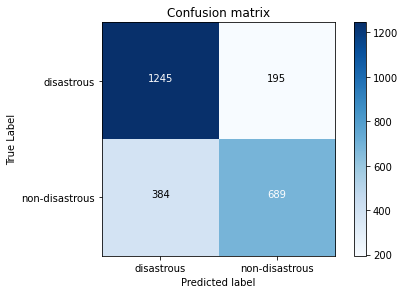

Accuracy_score:  0.7695980899323518
Precision_score:  0.7794117647058824
Recall_score:  0.6421248835041938
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1440
           1       0.78      0.64      0.70      1073

    accuracy                           0.77      2513
   macro avg       0.77      0.75      0.76      2513
weighted avg       0.77      0.77      0.77      2513




Model = LogisticRegression() 	Vector = CountVectorizer(ngram_range=(1, 2))
Confusion Matrix, without normalization


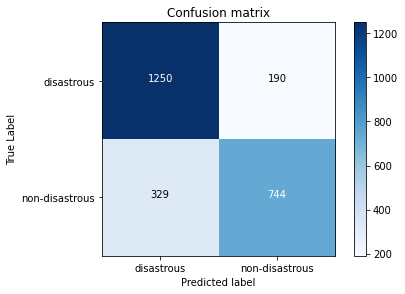

Accuracy_score:  0.7934739355352168
Precision_score:  0.7965738758029979
Recall_score:  0.6933830382106244
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1440
           1       0.80      0.69      0.74      1073

    accuracy                           0.79      2513
   macro avg       0.79      0.78      0.78      2513
weighted avg       0.79      0.79      0.79      2513




Model = MultinomialNB() 	Vector = CountVectorizer(ngram_range=(1, 2))
Confusion Matrix, without normalization


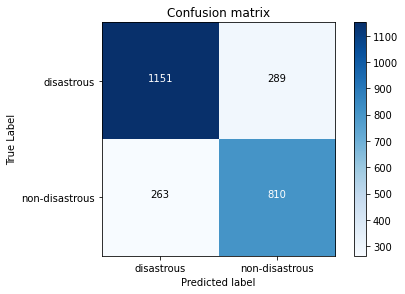

Accuracy_score:  0.7803422204536411
Precision_score:  0.7370336669699727
Recall_score:  0.7548928238583411
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1440
           1       0.74      0.75      0.75      1073

    accuracy                           0.78      2513
   macro avg       0.78      0.78      0.78      2513
weighted avg       0.78      0.78      0.78      2513




Model = RandomForestClassifier(n_estimators=40) 	Vector = CountVectorizer(ngram_range=(1, 2))
Confusion Matrix, without normalization


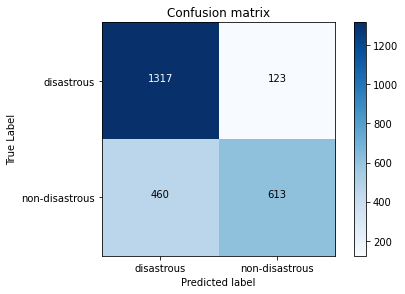

Accuracy_score:  0.7680063668921607
Precision_score:  0.8328804347826086
Recall_score:  0.5712954333643989
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.91      0.82      1440
           1       0.83      0.57      0.68      1073

    accuracy                           0.77      2513
   macro avg       0.79      0.74      0.75      2513
weighted avg       0.78      0.77      0.76      2513




Model = LogisticRegression() 	Vector = CountVectorizer(ngram_range=(1, 3))
Confusion Matrix, without normalization


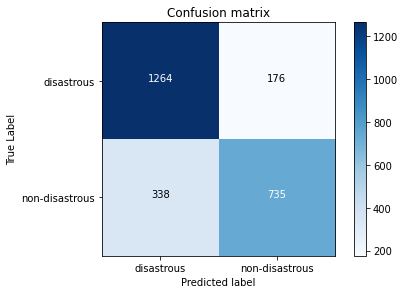

Accuracy_score:  0.7954635893354556
Precision_score:  0.8068057080131723
Recall_score:  0.684995340167754
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1440
           1       0.81      0.68      0.74      1073

    accuracy                           0.80      2513
   macro avg       0.80      0.78      0.79      2513
weighted avg       0.80      0.80      0.79      2513




Model = MultinomialNB() 	Vector = CountVectorizer(ngram_range=(1, 3))
Confusion Matrix, without normalization


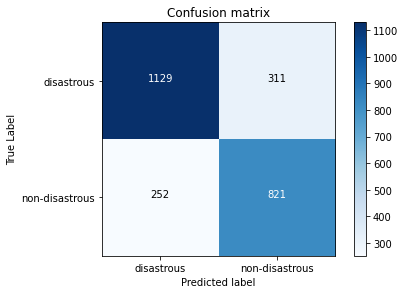

Accuracy_score:  0.7759649820931158
Precision_score:  0.7252650176678446
Recall_score:  0.7651444547996272
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1440
           1       0.73      0.77      0.74      1073

    accuracy                           0.78      2513
   macro avg       0.77      0.77      0.77      2513
weighted avg       0.78      0.78      0.78      2513




Model = RandomForestClassifier(n_estimators=40) 	Vector = CountVectorizer(ngram_range=(1, 3))
Confusion Matrix, without normalization


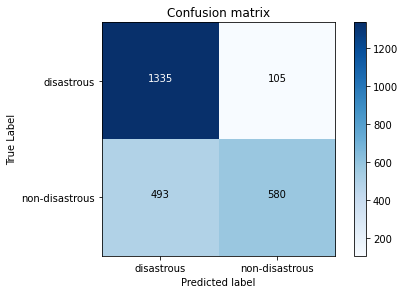

Accuracy_score:  0.7620374054914445
Precision_score:  0.8467153284671532
Recall_score:  0.5405405405405406
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.93      0.82      1440
           1       0.85      0.54      0.66      1073

    accuracy                           0.76      2513
   macro avg       0.79      0.73      0.74      2513
weighted avg       0.78      0.76      0.75      2513




Model = LogisticRegression() 	Vector = TfidfVectorizer()
Confusion Matrix, without normalization


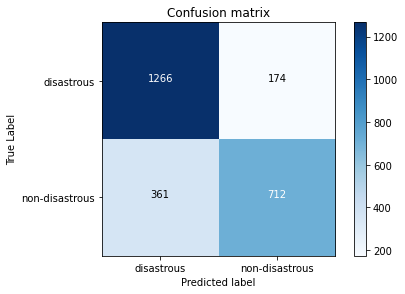

Accuracy_score:  0.7871070433744528
Precision_score:  0.8036117381489842
Recall_score:  0.6635601118359739
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1440
           1       0.80      0.66      0.73      1073

    accuracy                           0.79      2513
   macro avg       0.79      0.77      0.78      2513
weighted avg       0.79      0.79      0.78      2513




Model = MultinomialNB() 	Vector = TfidfVectorizer()
Confusion Matrix, without normalization


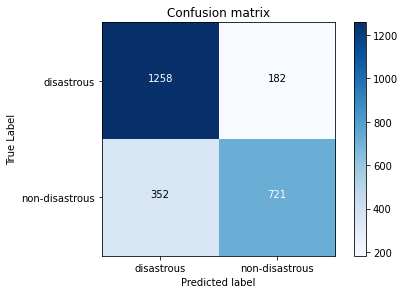

Accuracy_score:  0.7875049741345006
Precision_score:  0.7984496124031008
Recall_score:  0.6719478098788444
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1440
           1       0.80      0.67      0.73      1073

    accuracy                           0.79      2513
   macro avg       0.79      0.77      0.78      2513
weighted avg       0.79      0.79      0.78      2513




Model = RandomForestClassifier(n_estimators=40) 	Vector = TfidfVectorizer()
Confusion Matrix, without normalization


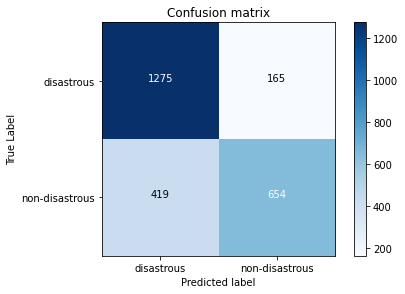

Accuracy_score:  0.767608436132113
Precision_score:  0.7985347985347986
Recall_score:  0.6095060577819198
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.89      0.81      1440
           1       0.80      0.61      0.69      1073

    accuracy                           0.77      2513
   macro avg       0.78      0.75      0.75      2513
weighted avg       0.77      0.77      0.76      2513






In [ ]:
res = []
for d, dt in texts_data.items():
    for v, vec in vectors.items():
        # text tranformation : text to number
        x = vec.fit_transform(dt.text)
        x_train, x_test, y_train, y_test = train_test_split(x, df.target, test_size=0.33, random_state=5)

        for m, mod in models.items():
            print('Model =', mod, '\tVector =', vec)
            
            CLR = mod
            CLR.fit(x_train, y_train)
            pred = CLR.predict(x_test)

            cm = confusion_matrix(y_test, pred)
            confusion_matrix_plot(cm, classes=['disastrous', 'non-disastrous'])
            
            acc_score = accuracy_score(y_test, pred)
            pre_score = precision_score(y_test, pred)
            rec_score = recall_score(y_test, pred)
            res.append([d, v, m, acc_score])
            print('Accuracy_score: ',acc_score)
            print('Precision_score: ',pre_score)
            print('Recall_score: ',rec_score)
            print("-"*50)
            cr = classification_report(y_test, pred)
            print(cr)
            print('\n\n')

In [ ]:
res

[['lemmatized_data', 'count_vect', 'logistic_regression', 0.7875049741345006],
 ['lemmatized_data', 'count_vect', 'naive_bayes', 0.7847194588141664],
 ['lemmatized_data', 'count_vect', 'random_forest', 0.7775567051333068],
 ['lemmatized_data', 'count_vect1', 'logistic_regression', 0.7934739355352168],
 ['lemmatized_data', 'count_vect1', 'naive_bayes', 0.7807401512136888],
 ['lemmatized_data', 'count_vect1', 'random_forest', 0.7632311977715878],
 ['lemmatized_data', 'count_vect2', 'logistic_regression', 0.7942697970553124],
 ['lemmatized_data', 'count_vect2', 'naive_bayes', 0.77875049741345],
 ['lemmatized_data', 'count_vect2', 'random_forest', 0.764424990051731],
 ['lemmatized_data', 'tfidf_vect', 'logistic_regression', 0.7886987664146439],
 ['lemmatized_data', 'tfidf_vect', 'naive_bayes', 0.7898925586947871],
 ['lemmatized_data', 'tfidf_vect', 'random_forest', 0.7743732590529248],
 ['stem_data', 'count_vect', 'logistic_regression', 0.7930760047751692],
 ['stem_data', 'count_vect', 'na

In [ ]:
res = []

md = LogisticRegression()

cv = CountVectorizer(ngram_range=(1,3))
X = cv.fit_transform(rem_both.text).toarray()
Y = df.target

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in skf.split(x, df.target):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    md.fit(X_train, y_train)
    pred = md.predict(X_test)
    score = f1_score(y_test, pred)    
    res.append(score)